In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from causalimpact import CausalImpact

In [ ]:
df = pd.read_excel('clients_type.xlsx')
df = df.rename(columns={
    'EXTRACT(YEARFROMMOMENT)': 'year',
    'EXTRACT(MONTHFROMMOMENT)': 'month',
    'CLIENT_TYPE': 'client_type',
    'COUNT(DISTINCT(KOD))': 'count'
})

grouped = df.groupby(['year', 'month'], as_index=False)['count'].sum()
grouped['date'] = grouped.apply(lambda row: f"{int(row['year']):04d}-{int(row['month']):02d}", axis=1)
grouped = grouped.sort_values(by=['year', 'month'])

result = grouped[['date', 'count']]
result = result[result['date'] != '2025-04']

print(result)

       date   count
0   2022-01  127272
1   2022-02  137944
2   2022-03   90491
3   2022-04  107886
4   2022-05  113340
5   2022-06  117067
6   2022-07  114506
7   2022-08  115007
8   2022-09  122033
9   2022-10  107314
10  2022-11  104791
11  2022-12  121759
12  2023-01  120469
13  2023-02  127658
14  2023-03  135452
15  2023-04  129248
16  2023-05  132750
17  2023-06  139626
18  2023-07  136628
19  2023-08  149027
20  2023-09  147793
21  2023-10  155078
22  2023-11  149855
23  2023-12  151429
24  2024-01  146151
25  2024-02  154169
26  2024-03  152732
27  2024-04  146217
28  2024-05  137275
29  2024-06  138145
30  2024-07  129218
31  2024-08  132205
32  2024-09  143383
33  2024-10  146300
34  2024-11  154463
35  2024-12  166465
36  2025-01  161145
37  2025-02  192911
38  2025-03  193265


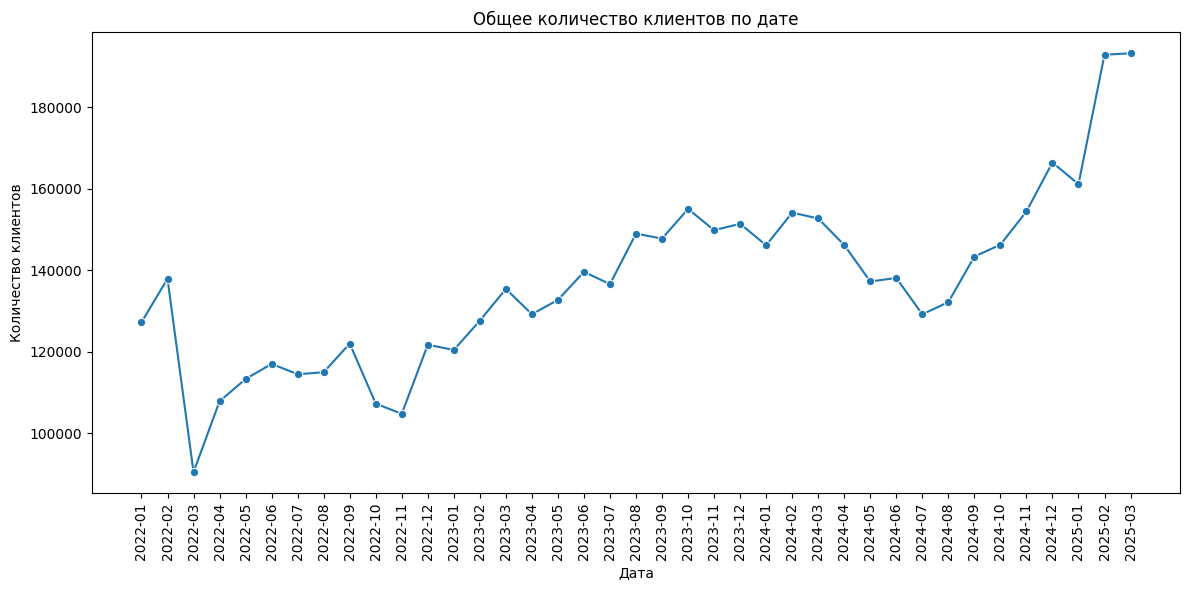

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=result, x='date', y='count', marker='o')
plt.title('Общее количество клиентов по дате')
plt.xlabel('Дата')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# result.to_excel('clients_summary.xlsx', index=False)

In [ ]:
import pandas as pd
import numpy as np
from causalimpact import CausalImpact

# Загрузка данных
data = {
    'date': ['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', 
             '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
             '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
             '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
             '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12',
             '2025-01', '2025-02', '2025-03'],
    'y': [127272, 137944, 90491, 107886, 113340, 117067, 
          114506, 115007, 122033, 107314, 104791, 121759,
          120469, 127658, 135452, 129248, 132750, 139626,
          136628, 149027, 147793, 155078, 149855, 151429,
          146151, 154169, 152732, 146217, 137275, 138145,
          129218, 132205, 143383, 146300, 154463, 166465,
          161145, 192911, 193265]
}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'] + '-01')
df.set_index('date', inplace=True)
df['x'] = np.random.randn(len(df))  # Случайный шум

pre_period = ['2022-01-01', '2024-06-01']
post_period = ['2024-07-01', '2024-12-01']

# Построение модели
impact = CausalImpact(
    df[['y', 'x']],  
    pre_period, 
    post_period,
    model_args={
        'nseasons': 12,           # Годовая сезонность (12 месяцев)
        'season_duration': 1,     # Продолжительность сезона (1 месяц)
        'prior_level_sd': 0.1,    # Сила сглаживания тренда
    }
)

# Визуализация
impact.run()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12557D+00    |proj g|=  4.88635D-01

At iterate    5    f=  8.99875D-01    |proj g|=  1.16471D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     16      1     0     0   5.366D-06   8.998D-01
  F =  0.89984065284252057     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


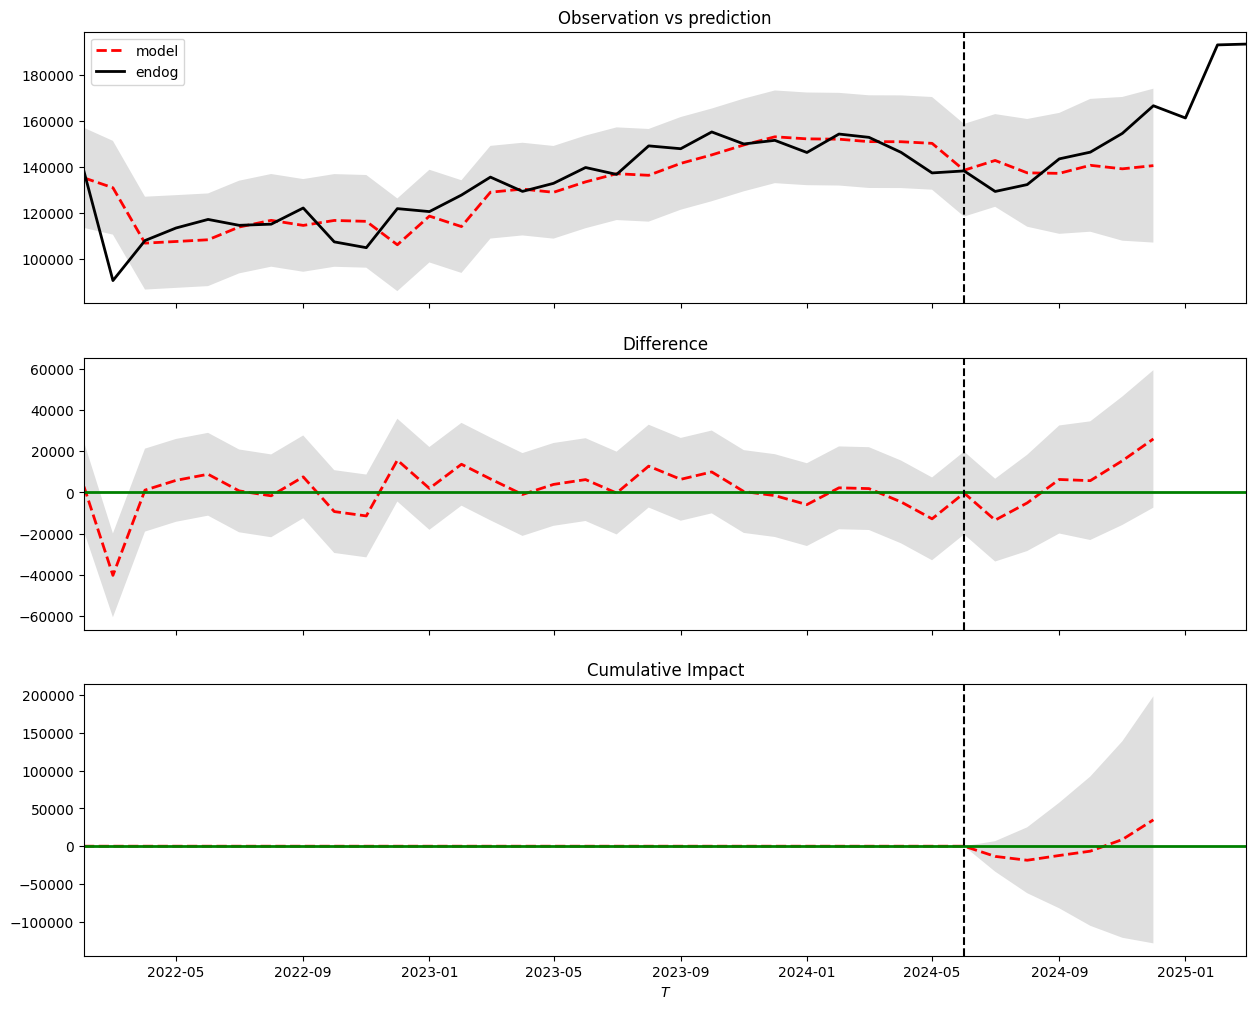

In [48]:
impact.plot()

In [49]:
impact.summary()

                                 Average         Cumulative
Actual                            145339             872034
Predicted                         139527             837167
95% CI                  [112302, 166753]  [673814, 1000520]
                                                           
Absolute Effect                     5811              34866
95% CI                   [33036, -21414]  [198219, -128486]
                                                           
Relative Effect                     4.2%               4.2%
95% CI                   [23.7%, -15.3%]    [23.7%, -15.3%]
                                                           
P-value                             0.0%                   
Prob. of Causal Effect            100.0%                   


In [50]:
impact.summary(output="report")

During the post-intervention period, the response             variable had an average value of             approx.
145339.  By contrast, in  the absence of an intervention, we would have expected an average response of 139527. The 95%
interval of this counterfactual prediction is [112302, 166753]. Subtracting this prediction from the observed response
yields an estimate of the causal effect the intervention had on the response variable. This effect is 5811 with a 95%
interval of [33036, -21414]. For a discussion of the significance of this effect, see below.


 Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully
interpreted), the response variable had an overall value of 872034.  By contrast, had  the intervention not taken place,
we would have expected a sum of 837167. The 95% interval of this prediction is [673814, 1000520]


 The above results are given in terms of absolute numbers. In relative terms, the response varia